Goal of this notebook:

Explore Random Forest hyperparameters to find the best common combination among all projects.

Outputs: 
- Validation curves for each hyperparameter
- Best combination of random forest hyperparameters

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import math

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [4]:
df_training = pd.read_csv("../../data/dataset-training.csv")
target_names = sorted(list(df_training['developerdecision'].unique()))
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.17787511605208656

### Base classifier

In [5]:
rf = RandomForestClassifier(random_state=99, n_jobs=5)

In [6]:
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [7]:
report_rf = result_rf.get_report_df(include_overall=True)
report_rf

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,CCI-MIT__XCoLab,5512,3757,0.96900,0.9740,0.9710,0.9740,0.57300,0.9390
1,apache__directory-server,845,652,0.91900,0.9230,0.9210,0.9230,0.51200,0.8430
2,jgralab__jgralab,2072,1802,0.87400,0.8760,0.8730,0.8760,0.49100,0.7560
3,CloudStack-extras__CloudStack-archive,1424,1106,0.80200,0.8070,0.8020,0.8070,0.43700,0.6570
4,Unidata__thredds,1154,950,0.91200,0.9200,0.9130,0.9200,0.77700,0.6420
5,apache__accumulo,4113,3148,0.85200,0.8610,0.8560,0.8610,0.63500,0.6180
6,Ramblurr__Anki-Android,892,759,0.72100,0.7440,0.7270,0.7440,0.43900,0.5450
7,getrailo__railo,815,572,0.69700,0.7120,0.7030,0.7120,0.37800,0.5370
8,apache__lucene-solr,1256,974,0.62700,0.6360,0.6300,0.6360,0.26600,0.5030
9,TeamDev-Ltd__OpenFaces,2979,2859,0.96500,0.9690,0.9670,0.9690,0.93800,0.4940


In [8]:
result_rf.get_accuracy_per_class_df(target_names, include_overall=True)

,project,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
0,Ramblurr__Anki-Android,0.171875,0.200000,0.000000,0.663934,0.000000,0.867868,0.819820
1,apache__directory-server,0.000000,NaN,NaN,0.250000,NaN,0.932039,0.934132
2,android__platform_frameworks_base,0.463964,0.181818,0.200000,0.325000,0.000000,0.974727,0.500000
3,freenet__fred,0.648305,0.460317,0.000000,0.473282,0.000000,0.821516,0.538922
4,alexo__wro4j,0.668367,0.000000,0.142857,0.513932,0.000000,0.676190,0.351485
5,apache__lucene-solr,0.494949,0.313725,0.000000,0.601896,0.125000,0.750000,0.749035
6,getrailo__railo,0.460000,0.439024,0.000000,0.405063,0.000000,0.819672,0.851852
7,atlasapi__atlas,0.494845,0.309524,0.285714,0.377551,0.000000,0.659574,0.839080
8,hibernate__hibernate-orm,0.730942,0.509434,0.000000,0.297030,0.062500,0.713450,0.576389
9,CloudStack-extras__CloudStack-archive,0.504762,0.824859,0.714286,0.603175,0.400000,0.919255,0.821429


### Validation curves

- n_estimators: 80, 100, 200, 300, 400
- max_features: auto, sqrt, 0.2
- max_depth: None, 10, 20, 30
- min_samples_leaf: 1,2,3,4
- min_samples_split: 2,3,4,5

##### parameter: n_estimators

n_estimators : int, default=100

The number of trees in the forest.

80, 100, 200, 300, 400

### Overall

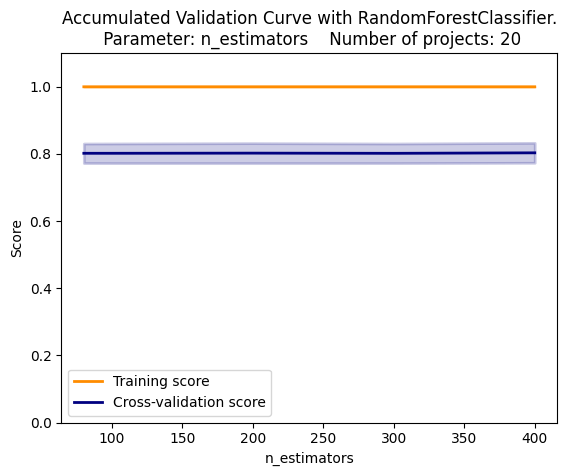

In [9]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'n_estimators',
                                      [80,100,200,300,400],
                                      non_features_columns)

### Per project

In [10]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'n_estimators',
                                      [80,100,200,300,400],
                                      non_features_columns)

##### max_features

"auto", "sqrt", "log2", int or float, default=”auto”

The number of features to consider when looking for the best split.

Use 0.1, 0.2, 0.3
Include the others in the grid search

### Overall

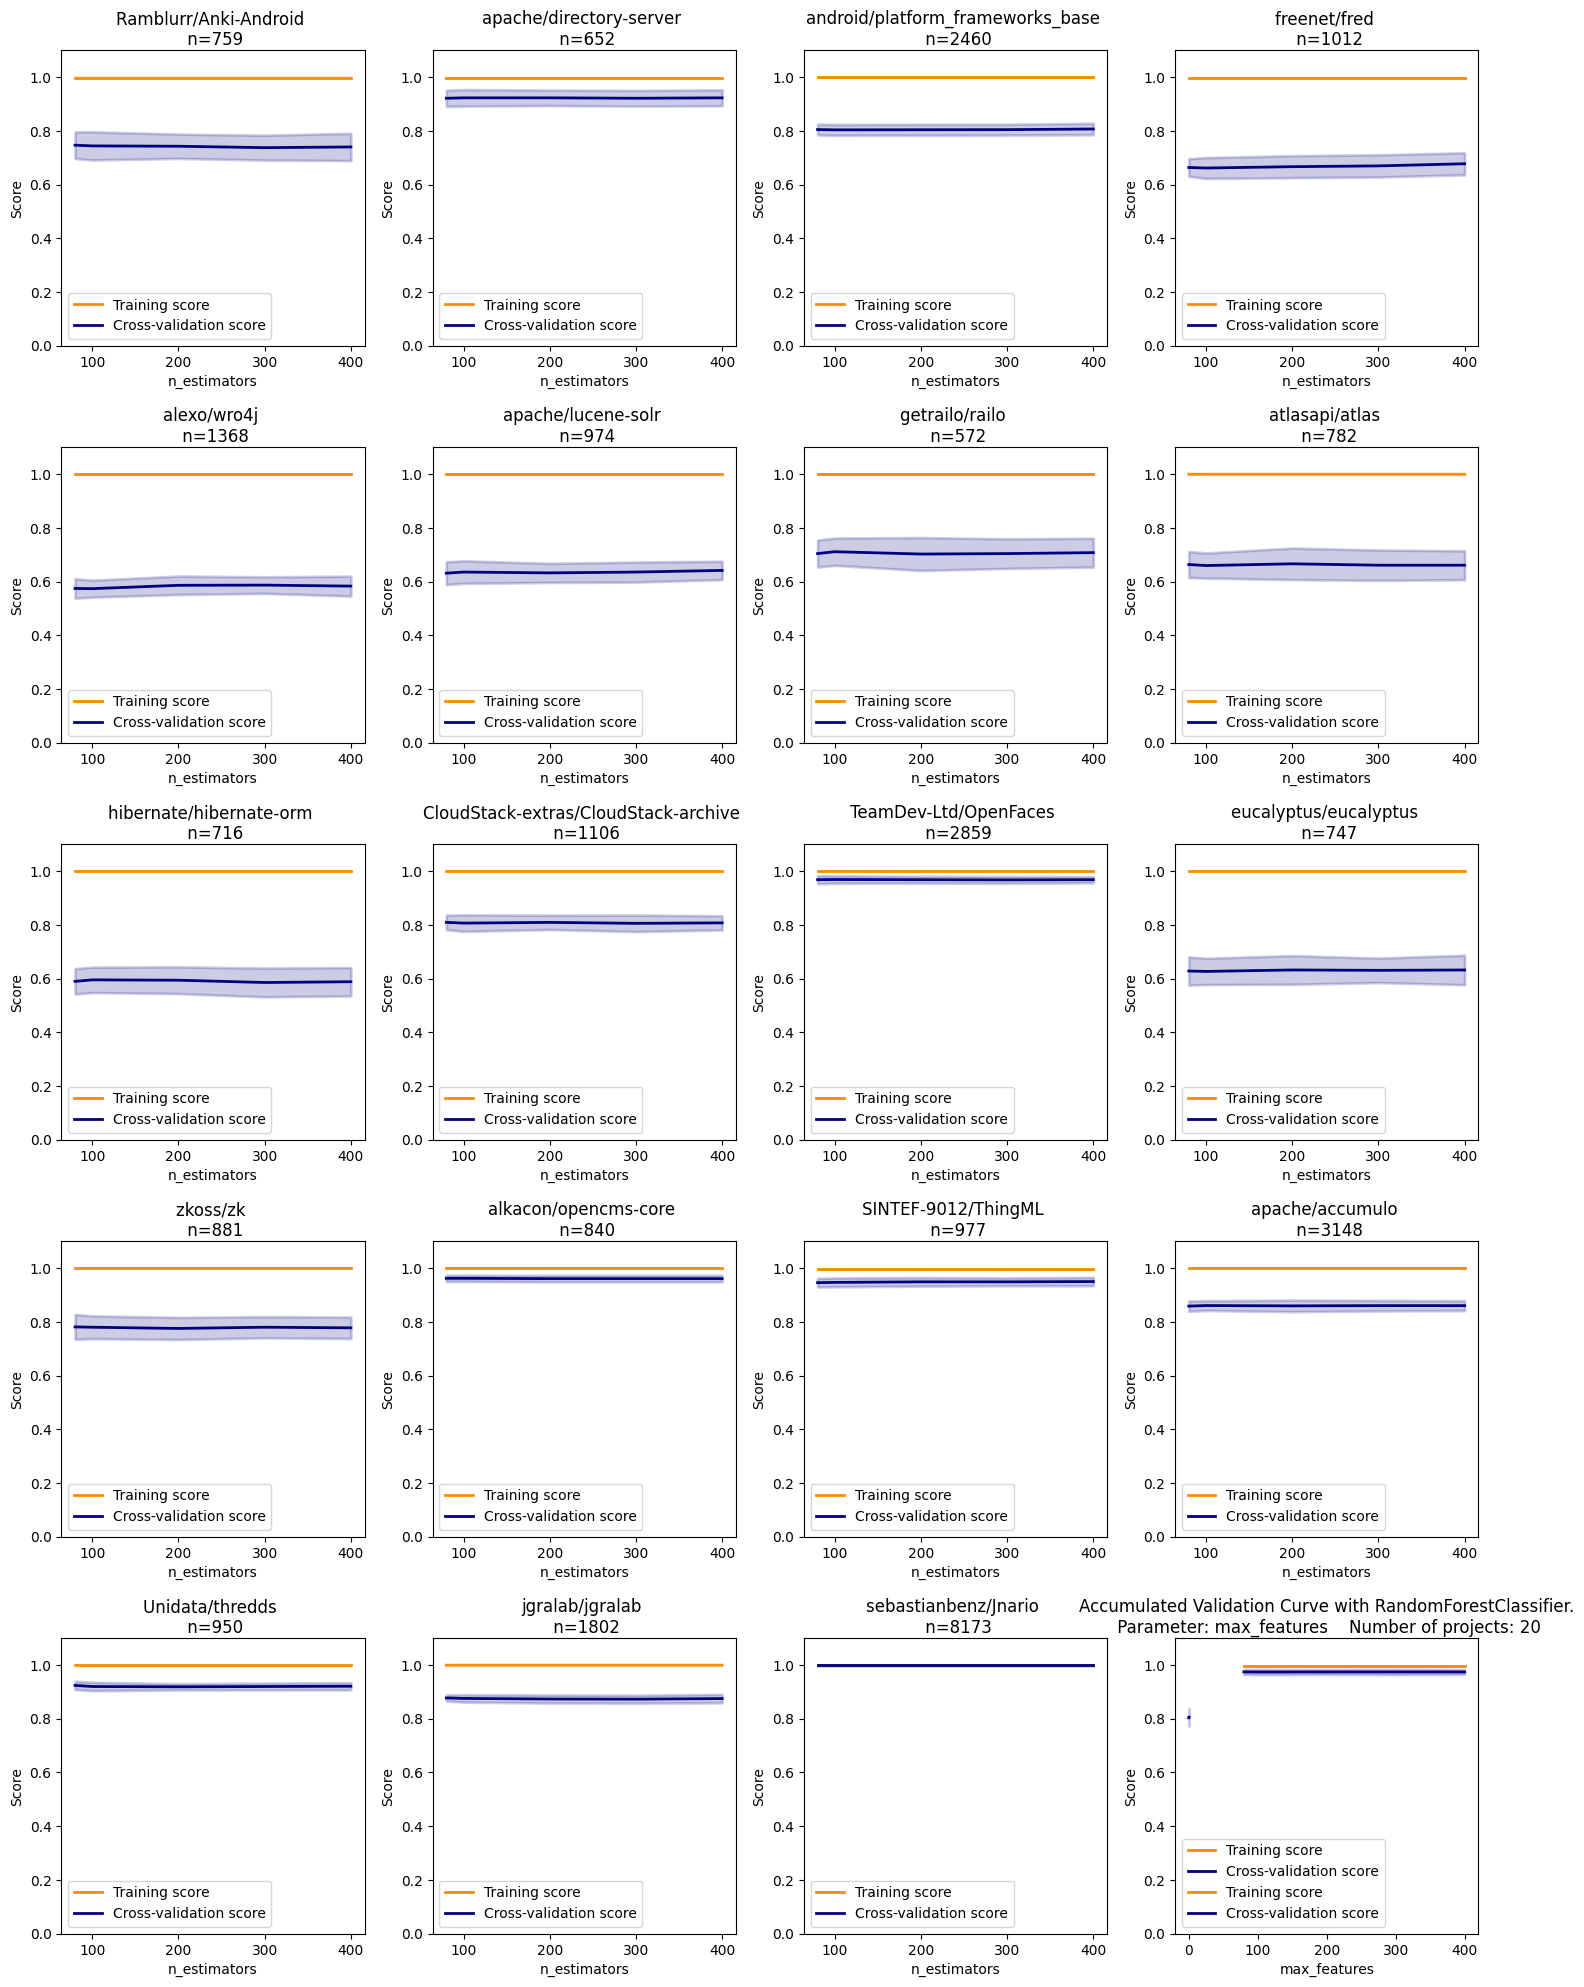

In [11]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'max_features',
                                        np.arange(0.1,0.5,0.1),
                                        non_features_columns)

### Per project

In [12]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'max_features',
                                        np.arange(0.1,0.5,0.1),
                                        non_features_columns)

#### max_depth

max_depth : int, default=None

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
None, 10, 20, 30

In [13]:
average_tree_depth, tree_depths = classifier_utils.get_average_tree_depth(rf, projects, non_features_columns)
print(f'Average tree depth using default max_depth: {average_tree_depth}')

Average tree depth using default max_depth: 18.1525


### Overall

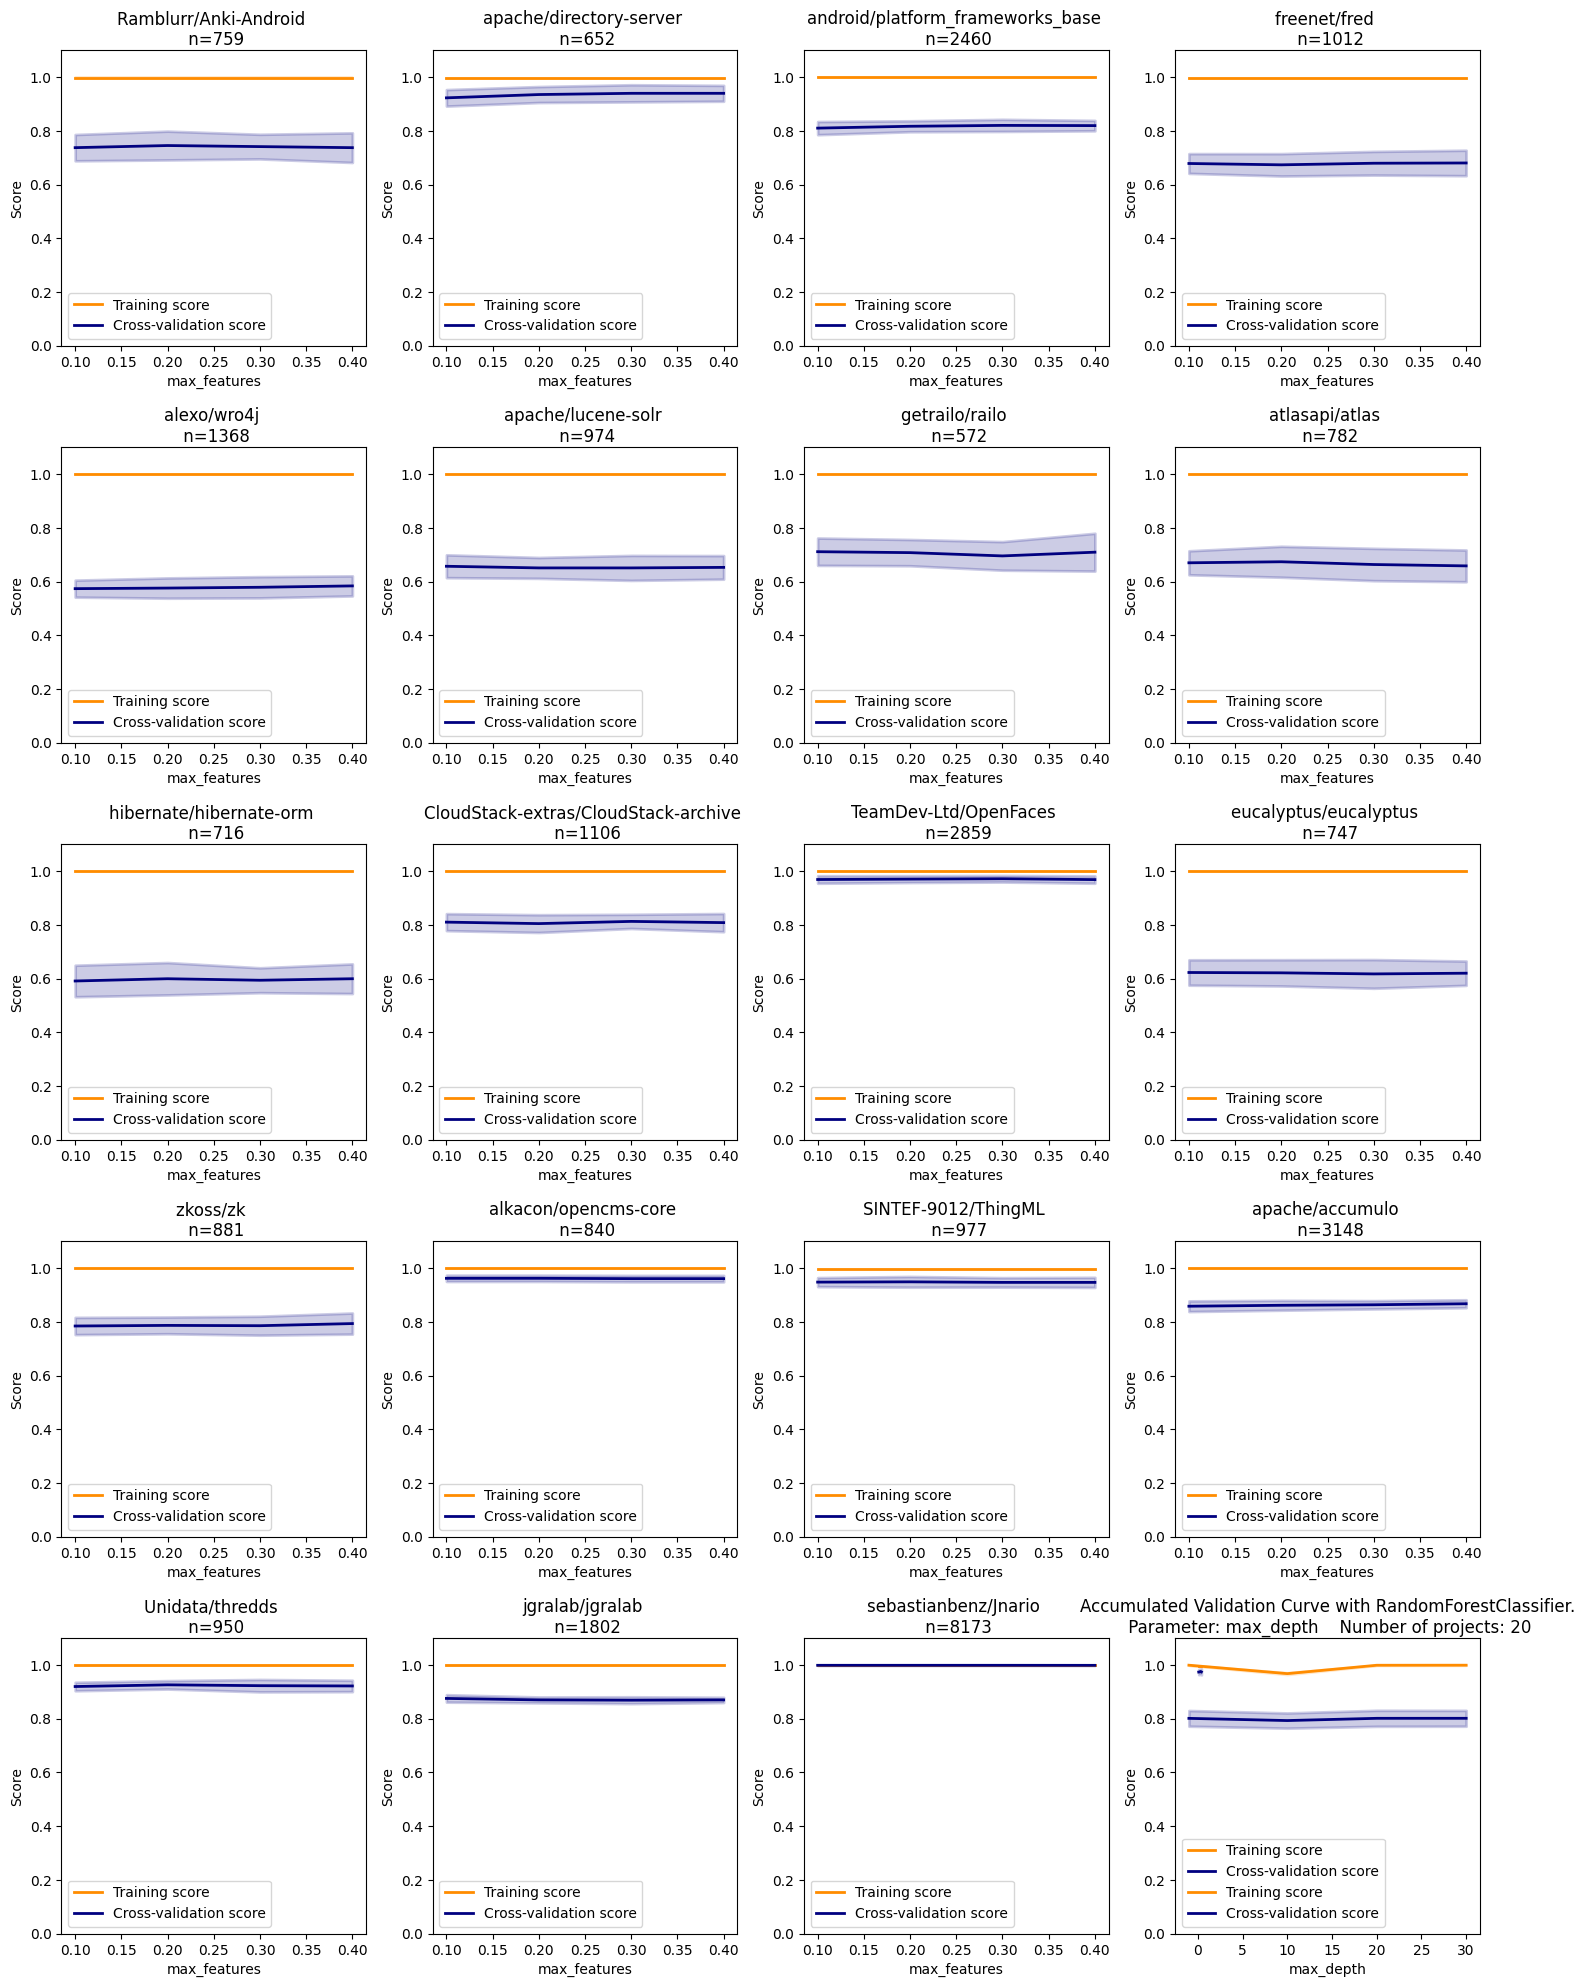

In [14]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'max_depth',
                                        [None, 10,20,30],
                                        non_features_columns)

### Per project

In [15]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'max_depth',
                                        [None, 10,20,30],
                                        non_features_columns)

#### min_samples_leaf

max_depth : int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

1,2,3,4

### Overall

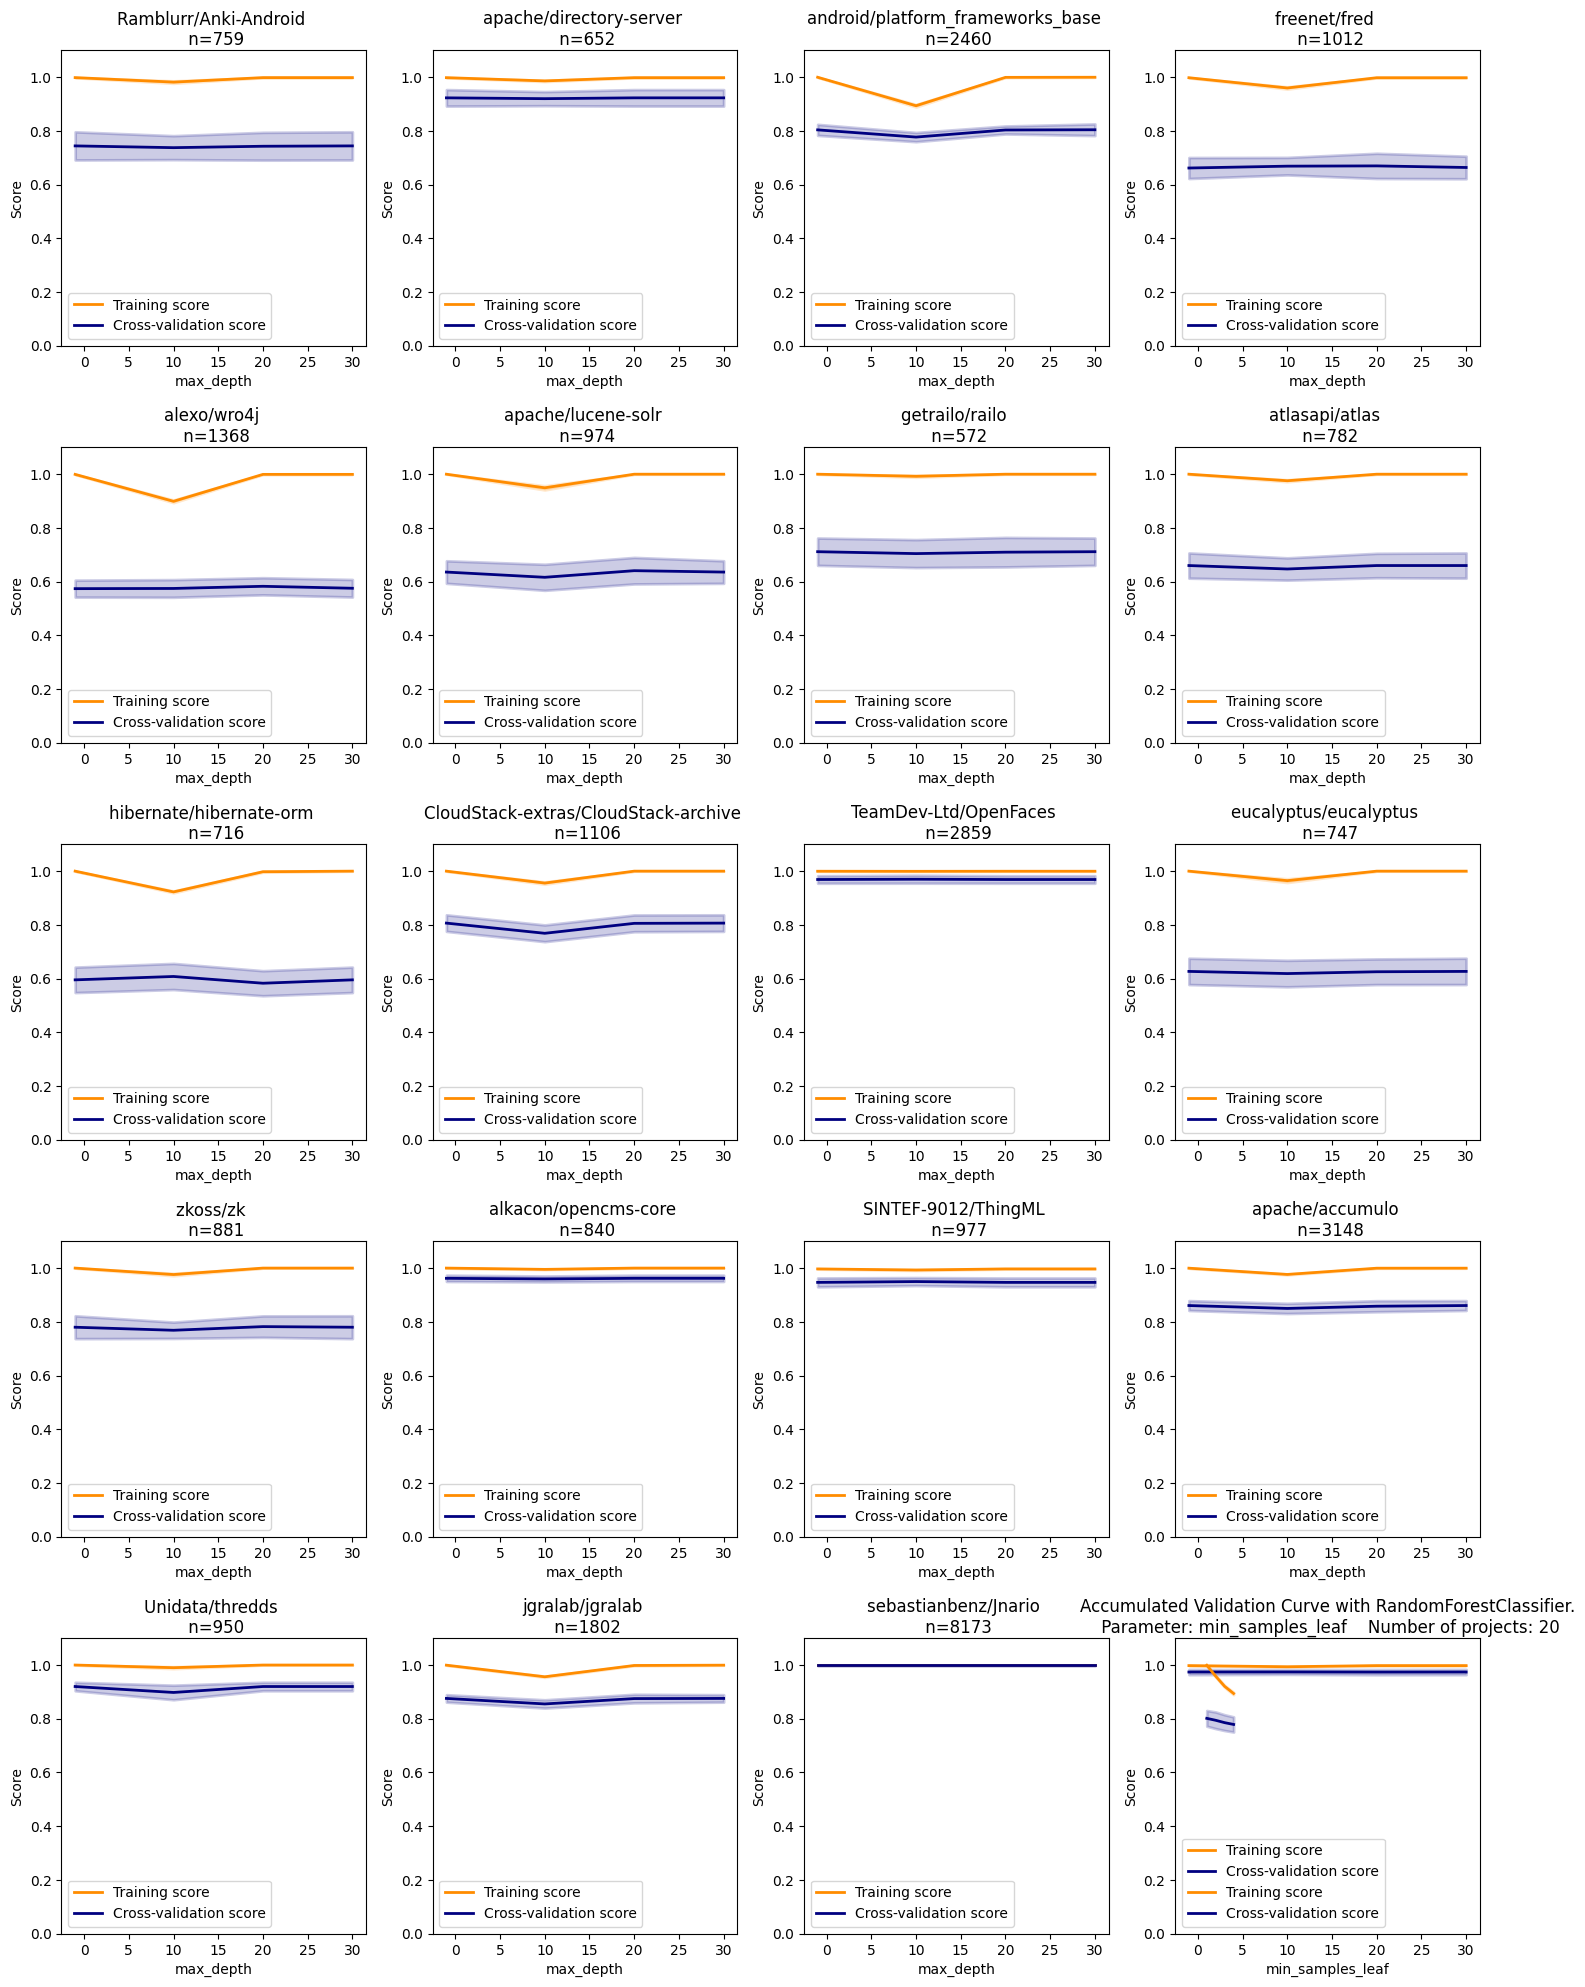

In [16]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'min_samples_leaf',
                                        [1,2,3,4],
                                        non_features_columns)

### Per project

In [17]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'min_samples_leaf',
                                        [1,2,3,4],
                                        non_features_columns)

#### min_samples_split

max_depth : int or float, default=2

The minimum number of samples required to split an internal node

2,3,4,5

### Overall

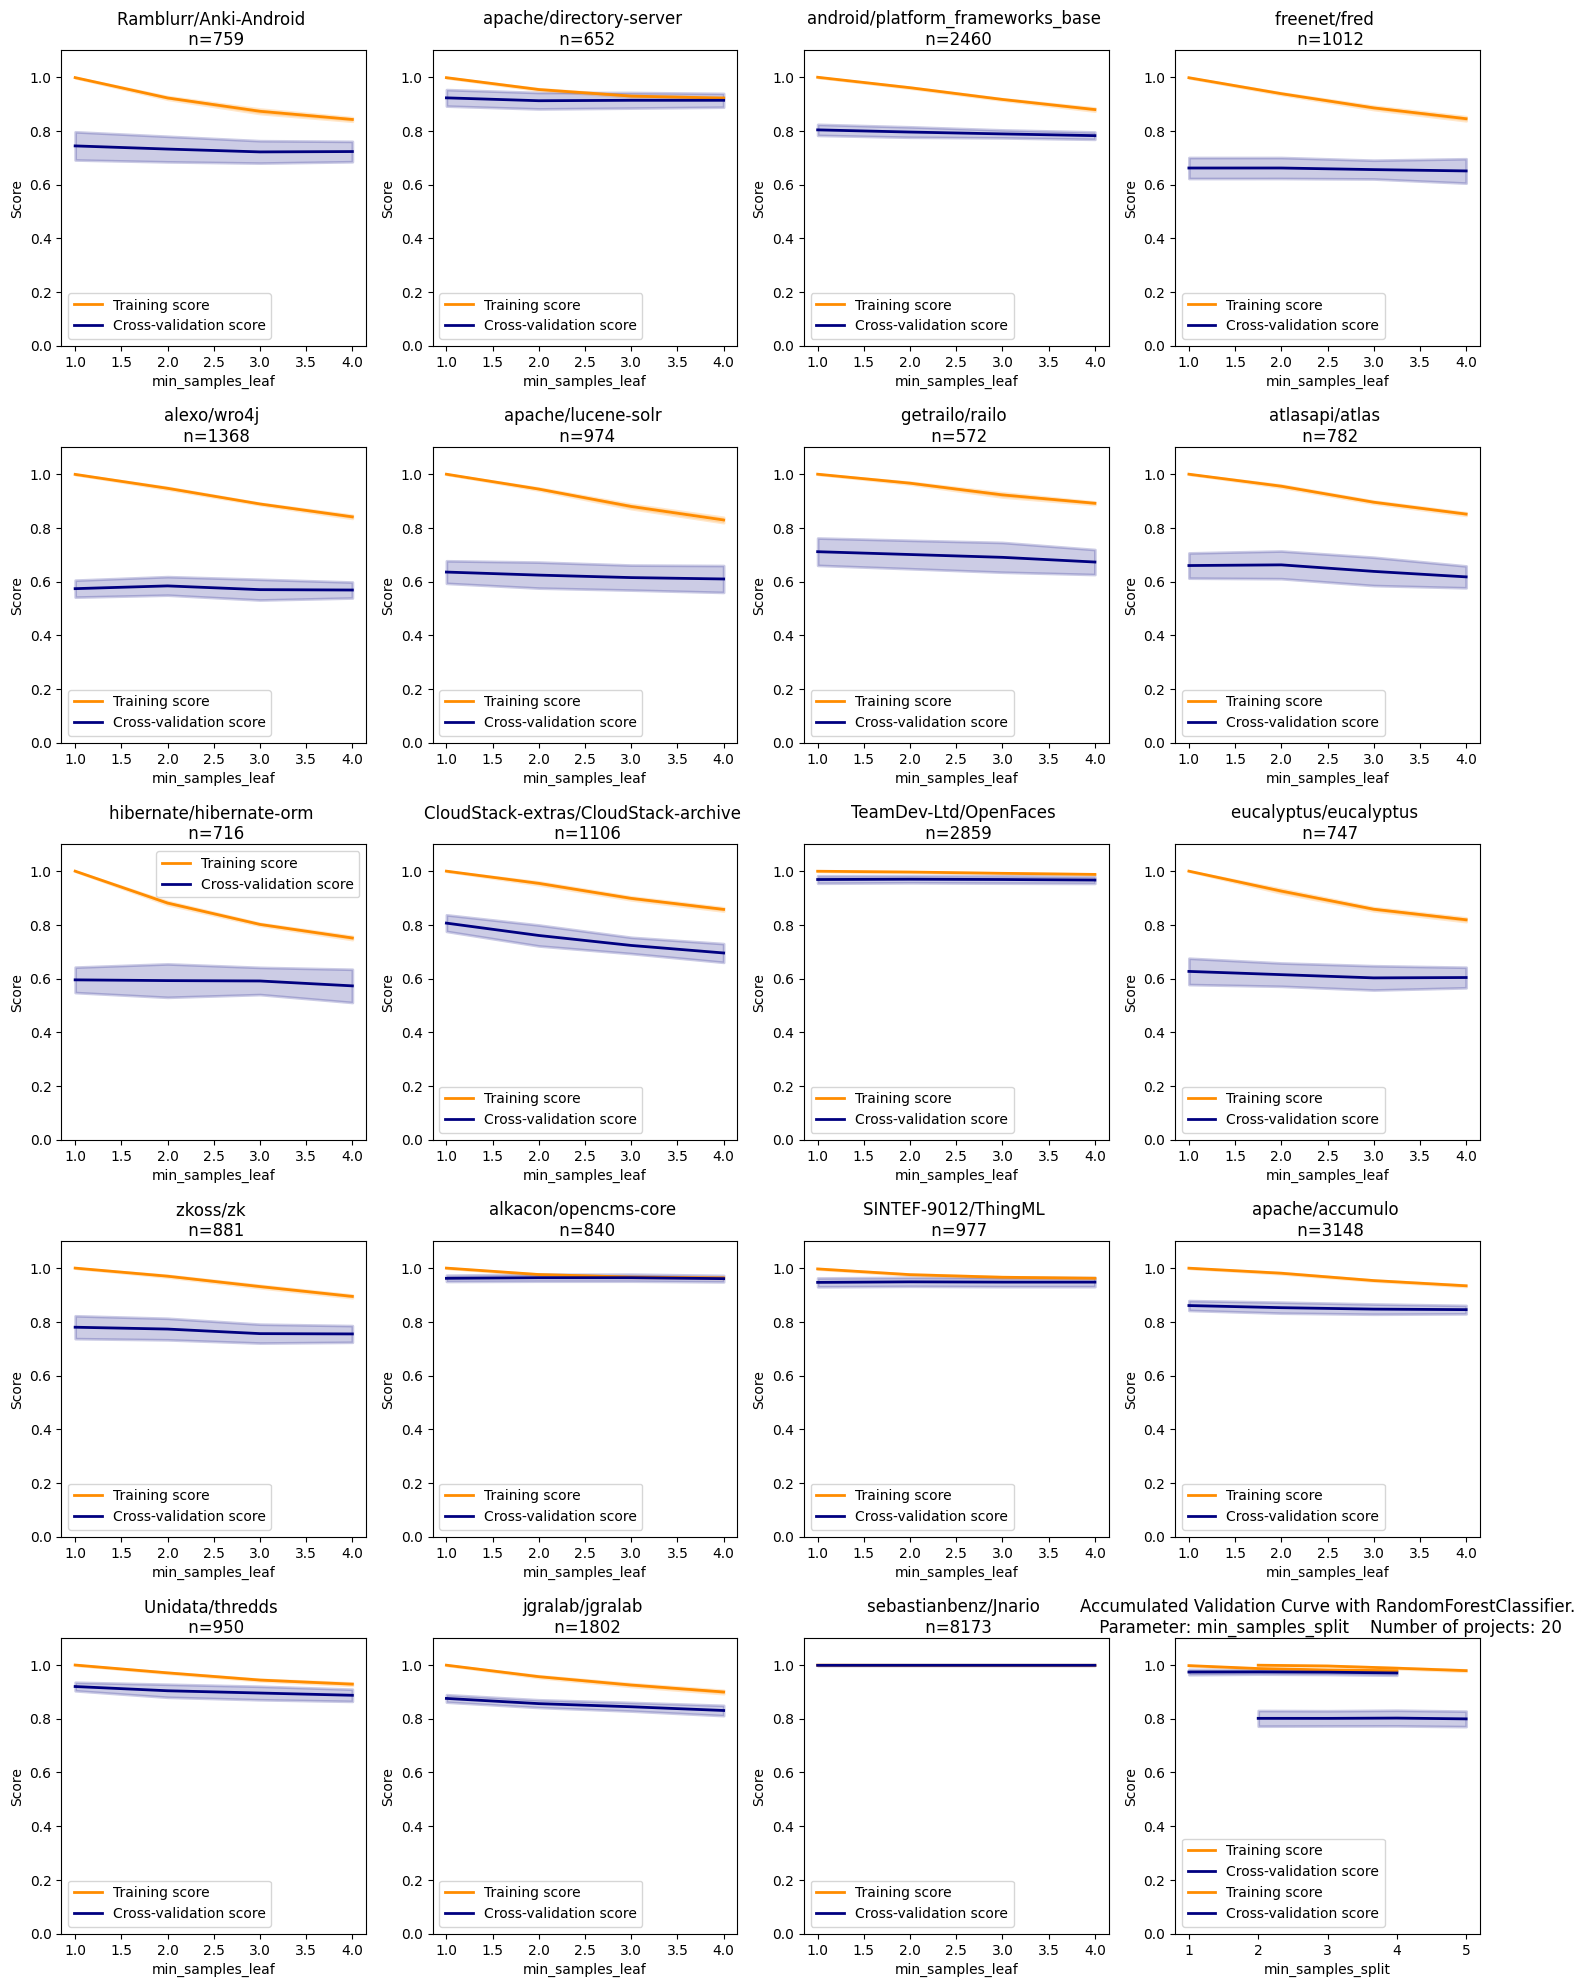

In [18]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf, 'min_samples_split',
                                        [2,3,4,5],
                                        non_features_columns)

### Per project

In [19]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf, 'min_samples_split',
                                        [2,3,4,5],
                                        non_features_columns)

### Tuning hyperparameters


Parameters range to explore, according to the validation curves:

- n_estimators: not much visible difference. Use default (100) and 400.
- max_features: Not much visible difference. Use 0.3 and experiment the other values: auto, sqrt, log2.
- max_depth: No variation. Use None as default.
- min_samples_leaf: the training score seems to decrease as the parameter increases. However, the cross-validation score seems to remain constant. Experiment the default value (1), which has the best training score and 4, where the distance between the two curves is smaller.
- min_samples_split: no visible variation. Do not consider in gridsearch

In [20]:
print("Hyperparameters of the Random Forest:")
rf.get_params()

Hyperparameters of the Random Forest:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 5,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}

In [21]:
parameters = {'n_estimators':[100,400],
              'max_features':[0.3, 'auto', 'sqrt', 'log2'],
              'min_samples_leaf':[1,4]              
             }

In [22]:
rf = RandomForestClassifier(random_state=99, n_jobs=5)

In [23]:
results = classifier_utils.grid_search_all(projects, rf, parameters, non_features_columns)

### Ranking combinations by medals

In [24]:
results.sort_values(['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], ascending=False)

,n_estimators,max_features,min_samples_leaf,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
0,100,0.3,1,0.804548,12,7,3,2,4.35
14,400,log2,1,0.803107,5,4,1,0,5.60
8,400,0.3,1,0.805372,13,2,10,1,3.80
2,100,auto,1,0.801465,7,2,1,4,5.35
4,100,sqrt,1,0.801465,7,2,1,4,5.35
1,100,0.3,4,0.790261,4,2,1,1,7.70
9,400,0.3,4,0.790859,3,2,1,0,7.55
10,400,auto,1,0.802825,5,1,2,2,4.65
12,400,sqrt,1,0.802825,5,1,2,2,4.65
6,100,log2,1,0.801378,6,1,1,4,5.60


### Ranking combinations by mean rank

In [25]:
results.sort_values(['mean_rank'])

,n_estimators,max_features,min_samples_leaf,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
8,400,0.3,1,0.805372,13,2,10,1,3.80
0,100,0.3,1,0.804548,12,7,3,2,4.35
10,400,auto,1,0.802825,5,1,2,2,4.65
12,400,sqrt,1,0.802825,5,1,2,2,4.65
2,100,auto,1,0.801465,7,2,1,4,5.35
4,100,sqrt,1,0.801465,7,2,1,4,5.35
6,100,log2,1,0.801378,6,1,1,4,5.60
14,400,log2,1,0.803107,5,4,1,0,5.60
9,400,0.3,4,0.790859,3,2,1,0,7.55
1,100,0.3,4,0.790261,4,2,1,1,7.70


## Comparing the models with the best parameters with the base model

In [26]:
base_model = rf
model_1 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=100, max_features=0.3, min_samples_leaf=1)
model_2 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=400, max_features='auto', min_samples_leaf=1)
model_3 = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=400, max_features=0.3, min_samples_leaf=1)

In [27]:
models = [base_model, model_1, model_2, model_3]
models_names = ['base', 'model1', 'model2', 'model3']
import importlib
importlib.reload(classifier_utils)
comparison = classifier_utils.compare_models(models, models_names, projects, non_features_columns)

In [28]:
comparison.filter(regex=("model|accuracy|precision|recall")).sort_values(['accuracy'], ascending=False)

,precision,recall,accuracy,model
3,0.79620,0.80535,0.80535,model3
1,0.79570,0.80460,0.80460,model1
2,0.79140,0.80275,0.80275,model2
0,0.78975,0.80160,0.80160,base
